In [212]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

LONDON_DATA_FILE = 'house_prices_london.csv'
LONDON_DATA_FILE_GROUPED = 'house_prices_london_grouped.csv'
LONDON_DATA_FILE_GROUPED_TIMESERIES= 'house_prices_london_grouped_timeseries.csv'



In [2]:
df = pd.read_csv('pp-complete.csv', header=None)

In [3]:
df.shape #22.8m rows

(22763598, 16)

In [4]:
#get an idea of the data
#df.loc[0]

In [5]:
#df.tail(2)

In [6]:
df.columns=['ID','Sold Price','Sold Date','Postcode','Type','New Build','Freehold/Sharehold','House Number1','House Number2','Street Name1','City1','City2','Borough','Region','Unconfirmed1','Unconfirmed2']

In [7]:
#drop some of the columns such as ID, Unconfirmed1, Unconfirmed2
filtered_df=pd.DataFrame(df, columns=['Sold Price','Sold Date','Postcode','Type','New Build','Freehold/Sharehold','House Number1','House Number2','Street Name1','City1','City2','Borough','Region'])
filtered_df.tail(2) 

,Sold Price,Sold Date,Postcode,Type,New Build,Freehold/Sharehold,House Number1,House Number2,Street Name1,City1,City2,Borough,Region
22763596,40000,2017-04-06 00:00,SA33 4PQ,O,Y,F,DAWNS Y MOR,PLOT 2,NaN,PENDINE,CARMARTHEN,CARMARTHENSHIRE,CARMARTHENSHIRE
22763597,500000,2017-06-26 00:00,LD2 3NP,O,N,F,CAER BERIS MANOR HOTEL & RESTAURANT,NaN,NaN,NaN,BUILTH WELLS,POWYS,POWYS


In [8]:
#filter for specific region only
#final_df=filtered_df[filtered_df.Region=="GREATER LONDON"] #includes Essex etc
final_df=filtered_df[(filtered_df.City1=='LONDON')|(filtered_df.City2=='LONDON')]
final_df.tail(2) 
final_df=final_df.sort_values(by='Sold Date',ascending=True) #sort by sold date

In [9]:
final_df.shape #1.8m

(1801815, 13)

In [10]:
#check data
#final_df.iloc[0]
#final_df.tail(2) #does this contain 2017 data?

In [11]:
#don't need this as still in memory
#lon_df = pd.read_csv(LONDON_DATA_FILE, header=0, encoding = "ISO-8859-1") #change encoding type
#lon_df.iloc[0]
#lon_df.tail(2)

In [12]:
#fails with memory error
#gl_df['Postcode_short'] = df['Postcode'].str.split('::').str[0]

In [13]:
#check data types
#gl_df.dtypes

In [14]:
#fails with float errors
#gl_df['Postcode_short'] = [x.split()[0] for x in gl_df['Postcode']]

In [15]:
#fails
#gl_df['Postcode_short'] = gl_df['Postcode'].str.split()[0]

In [16]:
#extract first part of postcode
final_df['Postcode'] = final_df['Postcode'].astype('str') 
final_df['Postcode_short'] = [x.split()[0] for x in final_df['Postcode']]

In [17]:
#final_df.loc[100120]
final_df.shape #1.8m records

(1801815, 14)

In [18]:
final_df.tail(2)

,Sold Price,Sold Date,Postcode,Type,New Build,Freehold/Sharehold,House Number1,House Number2,Street Name1,City1,City2,Borough,Region,Postcode_short
22316189,145500,2017-09-27 00:00,N18 2XU,F,N,L,14,NaN,REGAL COURT,NaN,LONDON,ENFIELD,GREATER LONDON,N18
22316594,700000,2017-09-27 00:00,N7 8LS,F,N,L,"CASTLE COURT, 2A",FLAT 2,FURLONG ROAD,NaN,LONDON,ISLINGTON,GREATER LONDON,N7


In [19]:
#extract year
final_df['Sold Date'] = final_df['Sold Date'].astype('str') 
final_df['Sold Year'] = [x.split('-')[0] for x in final_df['Sold Date']]

In [20]:
final_df.head(2)

,Sold Price,Sold Date,Postcode,Type,New Build,Freehold/Sharehold,House Number1,House Number2,Street Name1,City1,City2,Borough,Region,Postcode_short,Sold Year
246833,51500,1995-01-01 00:00,NW4 4SZ,F,N,L,28,NaN,CANBERRA CLOSE,LONDON,LONDON,BARNET,GREATER LONDON,NW4,1995
297558,59000,1995-01-01 00:00,NW6 4SY,F,N,L,97,FLAT 2,WEST END LANE,LONDON,LONDON,CAMDEN,GREATER LONDON,NW6,1995


In [21]:
final_df.to_csv(LONDON_DATA_FILE, index=False)

In [22]:
#average price by postcode over all the years, not really what I want
#final_df_byPostcode=final_df['Sold Price'].groupby(final_df['Postcode_short'])
#final_df_byPostcode.median()

In [42]:
#Grouping 
Year_df=final_df.groupby(['Postcode_short','Sold Year', 'Type'])

,Sold Price,Sold Date,Postcode,Type,New Build,Freehold/Sharehold,House Number1,House Number2,Street Name1,City1,City2,Borough,Region,Postcode_short,Sold Year
246833,51500,1995-01-01 00:00,NW4 4SZ,F,N,L,28,NaN,CANBERRA CLOSE,LONDON,LONDON,BARNET,GREATER LONDON,NW4,1995
297558,59000,1995-01-01 00:00,NW6 4SY,F,N,L,97,FLAT 2,WEST END LANE,LONDON,LONDON,CAMDEN,GREATER LONDON,NW6,1995
502646,84000,1995-01-01 00:00,SW6 7UF,F,N,L,56,FLAT 1,TOURNAY ROAD,LONDON,LONDON,HAMMERSMITH AND FULHAM,GREATER LONDON,SW6,1995
139238,85000,1995-01-01 00:00,SW12 0HF,T,N,L,30,NaN,EMMANUEL ROAD,LONDON,LONDON,LAMBETH,GREATER LONDON,SW12,1995
484841,117000,1995-01-01 00:00,SW17 9QF,T,N,F,196,NaN,CROWBOROUGH ROAD,LONDON,LONDON,WANDSWORTH,GREATER LONDON,SW17,1995
730496,70495,1995-01-01 00:00,E14 7LE,F,Y,L,"MISSION BUILDING, 747",FLAT 113,COMMERCIAL ROAD,LONDON,LONDON,TOWER HAMLETS,GREATER LONDON,E14,1995
518971,300000,1995-01-01 00:00,SW19 5JU,F,Y,L,1,FLAT 6,SOMERSET ROAD,LONDON,LONDON,MERTON,GREATER LONDON,SW19,1995
660150,254000,1995-01-02 00:00,SW6 4AD,T,N,F,8,NaN,DELVINO ROAD,LONDON,LONDON,HAMMERSMITH AND FULHAM,GREATER LONDON,SW6,1995
82701,44000,1995-01-02 00:00,SE15 1QA,T,N,F,5,NaN,HOLBECK ROW,NaN,LONDON,SOUTHWARK,GREATER LONDON,SE15,1995
43932,75000,1995-01-02 00:00,SW15 3LF,F,N,L,61,FLAT 3,NaN,CLIFF ROAD,LONDON,WANDSWORTH,GREATER LONDON,SW15,1995


In [83]:
#Year_df.agg({'Sold Price':np.mean})
GrpYear_df=Year_df.agg({'Sold Price':np.median})

In [25]:
#GrpYear_df.head(2)

Sold Price
Postcode_short Sold Year Type            
E1             1995      D       108500.0
                         F        57995.0
                         S        77000.0
                         T        81000.0
               1996      F        63950.0
                         S        94000.0
                         T        80000.0
               1997      D       150000.0
                         F        79997.5
                         S       149497.5
                         T       102000.0
               1998      D       322250.0
                         F       112995.0
                         S       130000.0
                         T       118000.0
               1999      D       210000.0
                         F       121075.0
                         S       140000.0
                         T       144000.0
               2000      D       245000.0
                         F       150000.0
                         S       207000.0
                         T       180000.0
               2001      D       408250.0
                         F       162000.0
                         S       184000.0
                         T       198475.0
               2002      D       352500.0
                         F       180000.0
                         S       261500.0
                         T       226500.0
               2003      D       151000.0
                         F       175000.0
                         S       225000.0
                         T       237500.0

In [84]:
GrpYear_df.index.names #FrozenList(['Postcode_short', 'Sold Year', 'Type'])

FrozenList(['Postcode_short', 'Sold Year', 'Type'])

In [85]:
#switch values in DF to make it easier to work with
GrpYear_df['Postcode_short']=GrpYear_df.index.get_level_values(0)

In [87]:
#GrpYear_df.head(12)

Sold Price Postcode_short
Postcode_short Sold Year Type                           
E1             1995      D       108500.0             E1
                         F        57995.0             E1
                         S        77000.0             E1
                         T        81000.0             E1
               1996      F        63950.0             E1
                         S        94000.0             E1
                         T        80000.0             E1
               1997      D       150000.0             E1
                         F        79997.5             E1
                         S       149497.5             E1
                         T       102000.0             E1
               1998      D       322250.0             E1

In [88]:
GrpYear_df['Sold Year']=GrpYear_df.index.get_level_values(1)
GrpYear_df['Type']=GrpYear_df.index.get_level_values(2)

In [89]:
#GrpYear_df.head(15)

Sold Price Postcode_short Sold Year Type
Postcode_short Sold Year Type                                          
E1             1995      D       108500.0             E1      1995    D
                         F        57995.0             E1      1995    F
                         S        77000.0             E1      1995    S
                         T        81000.0             E1      1995    T
               1996      F        63950.0             E1      1996    F
                         S        94000.0             E1      1996    S
                         T        80000.0             E1      1996    T
               1997      D       150000.0             E1      1997    D
                         F        79997.5             E1      1997    F
                         S       149497.5             E1      1997    S
                         T       102000.0             E1      1997    T
               1998      D       322250.0             E1      1998    D
                         F       112995.0             E1      1998    F
                         S       130000.0             E1      1998    S
                         T       118000.0             E1      1998    T

In [90]:
#GrpYear_df.shape

(13246, 4)

In [33]:
GrpYear_df.to_csv(LONDON_DATA_FILE_GROUPED, index=False) #save to csv

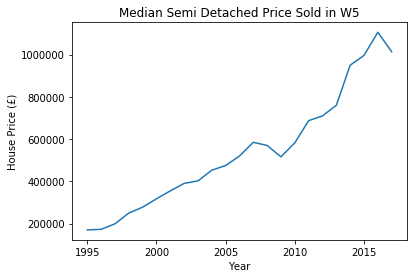

In [149]:
W5_S_df=GrpYear_df[(GrpYear_df['Postcode_short']=='W5') & (GrpYear_df['Type']=='S')]
plt.plot(W5_S_df['Sold Year'],W5_S_df['Sold Price'])
plt.xlabel('Year')
plt.ylabel('House Price (£)')
plt.title('Median Semi Detached Price Sold in W5')
plt.show()

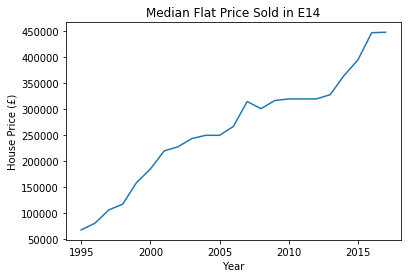

In [150]:
E14_F_df=GrpYear_df[(GrpYear_df['Postcode_short']=='E14') & (GrpYear_df['Type']=='F')]
plt.plot(E14_F_df['Sold Year'],E14_F_df['Sold Price'])
plt.xlabel('Year')
plt.ylabel('House Price (£)')
plt.title('Median Flat Price Sold in E14')
plt.show()

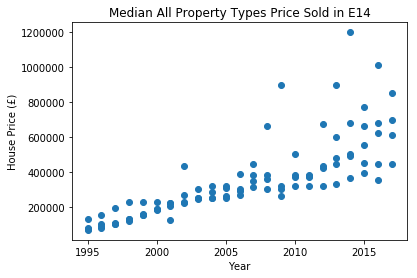

In [152]:
E14_All_df=GrpYear_df[(GrpYear_df['Postcode_short']=='E14')]
plt.scatter(E14_All_df['Sold Year'],E14_All_df['Sold Price'])
plt.xlabel('Year')
plt.ylabel('House Price (£)')
plt.title('Median All Property Types Price Sold in E14')
plt.show()

In [155]:
GrpYear_df.head(10)

Sold Price Postcode_short Sold Year Type
Postcode_short Sold Year Type                                          
E1             1995      D       108500.0             E1      1995    D
                         F        57995.0             E1      1995    F
                         S        77000.0             E1      1995    S
                         T        81000.0             E1      1995    T
               1996      F        63950.0             E1      1996    F
                         S        94000.0             E1      1996    S
                         T        80000.0             E1      1996    T
               1997      D       150000.0             E1      1997    D
                         F        79997.5             E1      1997    F
                         S       149497.5             E1      1997    S

In [161]:
E1_F_df=GrpYear_df[(GrpYear_df['Postcode_short']=='E1') & (GrpYear_df['Type']=='F')]
E1_F_df.head(10)


Sold Price Postcode_short Sold Year Type
Postcode_short Sold Year Type                                          
E1             1995      F        57995.0             E1      1995    F
               1996      F        63950.0             E1      1996    F
               1997      F        79997.5             E1      1997    F
               1998      F       112995.0             E1      1998    F
               1999      F       121075.0             E1      1999    F
               2000      F       150000.0             E1      2000    F
               2001      F       162000.0             E1      2001    F
               2002      F       180000.0             E1      2002    F
               2003      F       175000.0             E1      2003    F
               2004      F       187500.0             E1      2004    F

In [165]:
#shifts Sold Price down one for all - doesn't work
#GrpYear_df['Sold Price-1']=GrpYear_df['Sold Price'].shift(1)

In [168]:
GrpYear_df.head(5)

Sold Price Postcode_short Sold Year Type  \
Postcode_short Sold Year Type                                             
E1             1995      D       108500.0             E1      1995    D   
                         F        57995.0             E1      1995    F   
                         S        77000.0             E1      1995    S   
                         T        81000.0             E1      1995    T   
               1996      F        63950.0             E1      1996    F   

                               Sold Price-1  
Postcode_short Sold Year Type                
E1             1995      D              NaN  
                         F         108500.0  
                         S          57995.0  
                         T          77000.0  
               1996      F          81000.0

In [170]:
#Not needed as already have the identifier as  shown in output
# Make dictionary mapping each time to the row index for that time.
# Because we have multiple rows for each individual time, this won't quite work correctly in this example.
times_to_indices = {}
for index, row in GrpYear_df.iterrows():
    times_to_indices[(row['Postcode_short'], row['Sold Year'], row['Type'])] = index
    
list(times_to_indices.items())[:5]

[(('E1', '1995', 'D'), ('E1', '1995', 'D')),
 (('E1', '1995', 'F'), ('E1', '1995', 'F')),
 (('E1', '1995', 'S'), ('E1', '1995', 'S')),
 (('E1', '1995', 'T'), ('E1', '1995', 'T')),
 (('E1', '1996', 'F'), ('E1', '1996', 'F'))]

In [177]:
def get_prev_year(row):
    Postcode_short = row['Postcode_short']
    Sold_Year = str(int(row['Sold Year'])-1)
    Type = row['Type']
    try:
        return GrpYear_df.loc[(Postcode_short, Sold_Year,Type)]['Sold Price']
    except KeyError:
        return np.nan

GrpYear_df['Sold Price prev year']= GrpYear_df.apply(get_prev_year, axis=1)

In [206]:
def get_prev_year2(row):
    Postcode_short = row['Postcode_short']
    Sold_Year = str(int(row['Sold Year'])-2)
    Type = row['Type']
    try:
        return GrpYear_df.loc[(Postcode_short, Sold_Year,Type)]['Sold Price']
    except KeyError:
        return np.nan

GrpYear_df['Sold Price prev year2']= GrpYear_df.apply(get_prev_year2, axis=1)

In [210]:
def get_prev_year3(row):
    Postcode_short = row['Postcode_short']
    Sold_Year = str(int(row['Sold Year'])-3)
    Type = row['Type']
    try:
        return GrpYear_df.loc[(Postcode_short, Sold_Year,Type)]['Sold Price']
    except KeyError:
        return np.nan

GrpYear_df['Sold Price prev year3']= GrpYear_df.apply(get_prev_year3, axis=1)

In [204]:
#one off to drop the incorrect row
#GrpYear_df.drop('Sold Price prev year2', axis=1, inplace=True)

In [211]:
GrpYear_df.head(15)

Sold Price Postcode_short Sold Year Type  \
Postcode_short Sold Year Type                                             
E1             1995      D       108500.0             E1      1995    D   
                         F        57995.0             E1      1995    F   
                         S        77000.0             E1      1995    S   
                         T        81000.0             E1      1995    T   
               1996      F        63950.0             E1      1996    F   
                         S        94000.0             E1      1996    S   
                         T        80000.0             E1      1996    T   
               1997      D       150000.0             E1      1997    D   
                         F        79997.5             E1      1997    F   
                         S       149497.5             E1      1997    S   
                         T       102000.0             E1      1997    T   
               1998      D       322250.0             E1      1998    D   
                         F       112995.0             E1      1998    F   
                         S       130000.0             E1      1998    S   
                         T       118000.0             E1      1998    T   

                               Sold Price prev year  Sold Price prev year2  \
Postcode_short Sold Year Type                                                
E1             1995      D                      NaN                    NaN   
                         F                      NaN                    NaN   
                         S                      NaN                    NaN   
                         T                      NaN                    NaN   
               1996      F                  57995.0                    NaN   
                         S                  77000.0                    NaN   
                         T                  81000.0                    NaN   
               1997      D                      NaN               108500.0   
                         F                  63950.0                57995.0   
                         S                  94000.0                77000.0   
                         T                  80000.0                81000.0   
               1998      D                 150000.0                    NaN   
                         F                  79997.5                63950.0   
                         S                 149497.5                94000.0   
                         T                 102000.0                80000.0   

                               Sold Price prev year3  
Postcode_short Sold Year Type                         
E1             1995      D                       NaN  
                         F                       NaN  
                         S                       NaN  
                         T                       NaN  
               1996      F                       NaN  
                         S                       NaN  
                         T                       NaN  
               1997      D                       NaN  
                         F                       NaN  
                         S                       NaN  
                         T                       NaN  
               1998      D                  108500.0  
                         F                   57995.0  
                         S                   77000.0  
                         T                   81000.0

In [213]:
GrpYear_df.to_csv(LONDON_DATA_FILE_GROUPED_TIMESERIES, index=False) #save to csv